In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data, decode_captions
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
data = load_coco_data(data_path='./data', split='train')
word_to_idx = data['word_to_idx']

image_idxs <type 'numpy.ndarray'> (400131,) int32
captions <type 'numpy.ndarray'> (400131, 17) int32
word_to_idx <type 'dict'> 11071
features <type 'numpy.ndarray'> (82783, 196, 512) float32
file_names <type 'numpy.ndarray'> (82783,) <U31
elapse time: 205.20


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=512, n_time_step=16, cell_type='lstm')

In [6]:
solver = CaptioningSolver(model, data, n_epochs=12, batch_size=128, update_rule='adam',
                                      learning_rate=0.0005, print_every=3000, save_every=2, image_path='./image/train2014_resized',
                                pretrained_model='./model/lstm/model-28', model_path='./model/lstm', test_model='./model/lstm/model-12', test_batch_size=100,
                                 candidate_caption_path='./data/', test_image_path='./image/val2014_resized')

In [5]:
solver.train()

The number of epoch: 12
Data size: 400131
Batch size: 128
Iterations per epoch: 3127
Start training with pretrained Model..

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial train loss: 2199.22266
Generated caption: a waffle iron and several pastries on a counter <END>
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train loss at epoch 1 & iteration 3000 (mini-batch): 2157.13232
Ground truth 1: <START> a girl is laying on her bed with her two kittens <END>
Ground truth 2: <START> two cat on a bed and something really hairy <END>
Ground truth 3: <START> there is abundant hair the bed both human and animal <END>
Ground truth 4: <START> a person sleeping in a bed with two cats <END>
Generated caption: a dog is lying down on the bed <END>


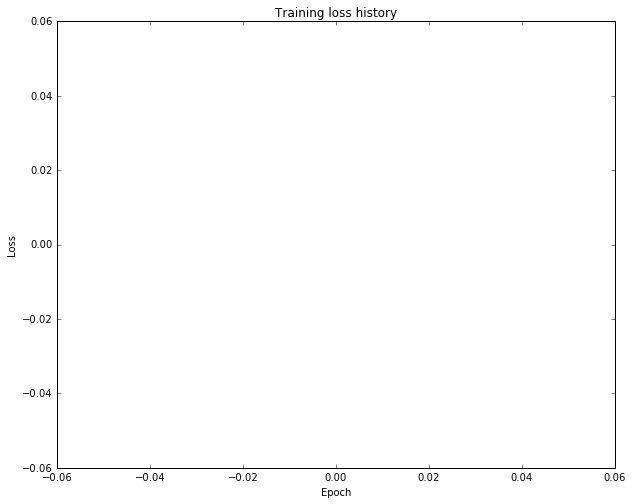

In [7]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

Sampled Caption: a baseball player is up to bat at a baseball game <END>


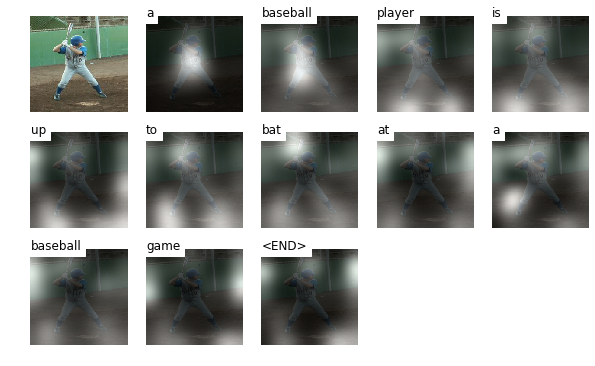

Sampled Caption: a small boy is playing on a blue park bench <END>


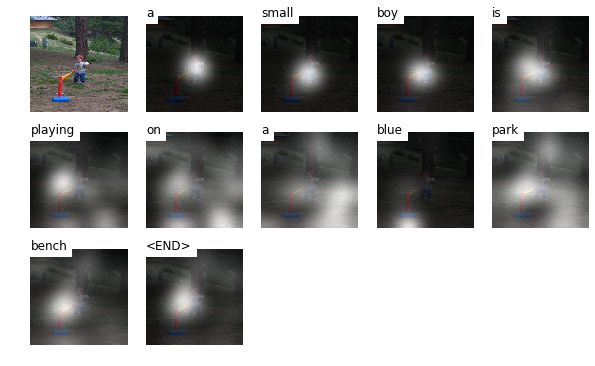

Sampled Caption: a woman sitting on a bench with a cell phone <END>


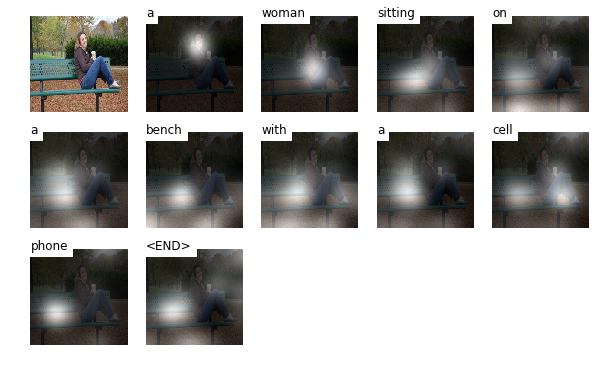

Sampled Caption: a table is covered with fruits veggies and <UNK> <END>


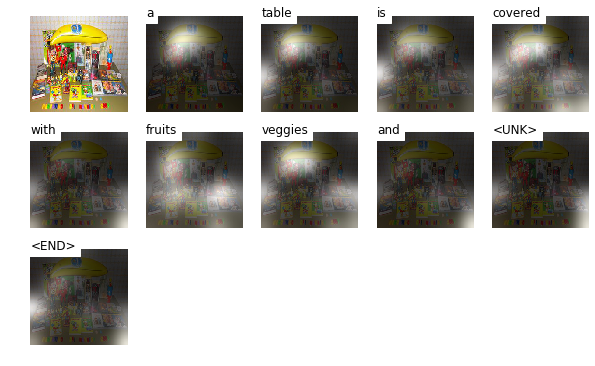

Sampled Caption: a person riding a bike on a city street <END>


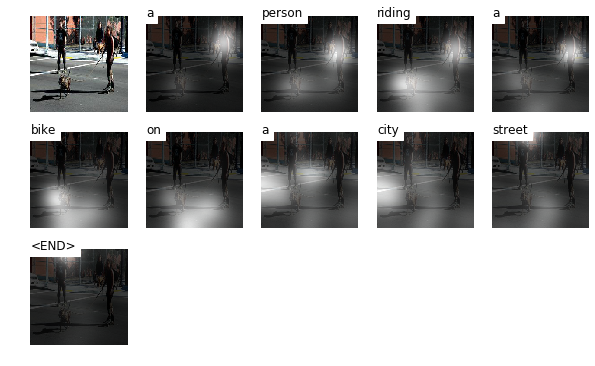

Sampled Caption: a boy in a blue jacket holding a laptop computer <END>


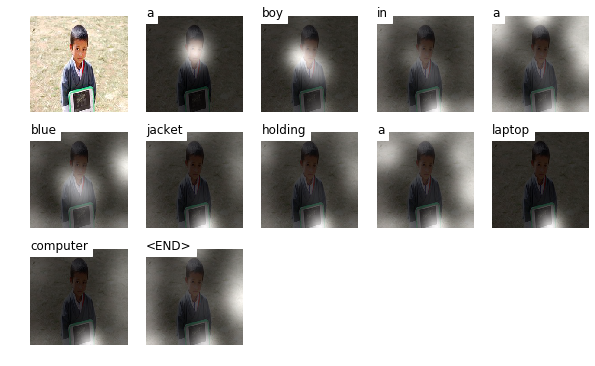

Sampled Caption: a dog is sitting under a black car <END>


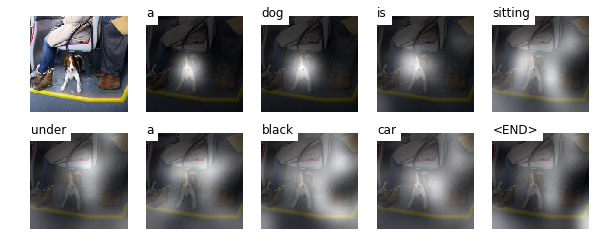

Sampled Caption: a white kitchen with a refrigerator oven and counters and lights <END>


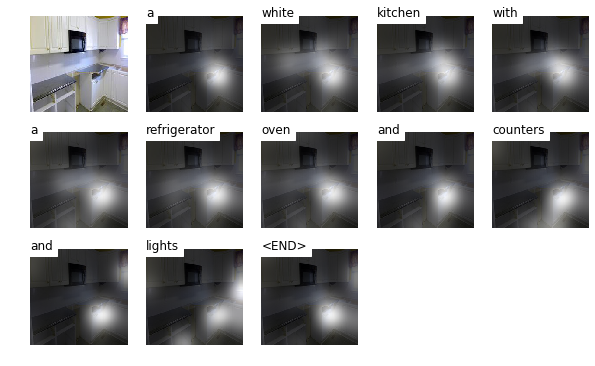

Sampled Caption: a double decked bus with the name <UNK> on it <END>


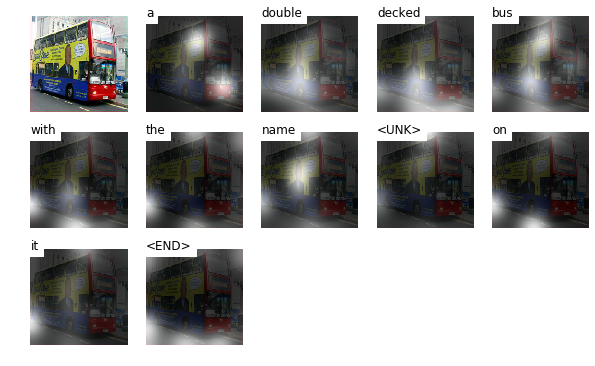

Sampled Caption: a group of cows that are standing in the grass <END>


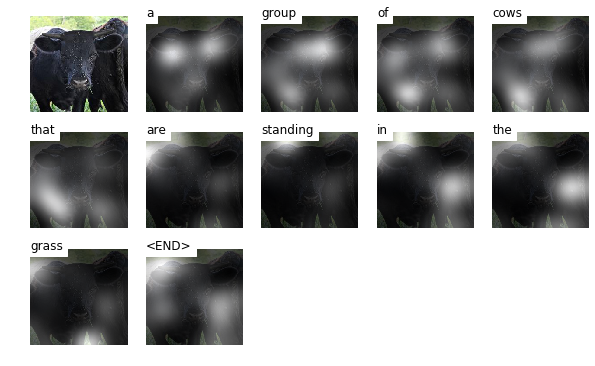

saved train.candidate.captions.pkl..


In [8]:
# sampled captions and visualize attention weigths for train dataset
solver.test(data)

In [9]:
# load validation dataset
val_data = load_coco_data(data_path='./data', split='val')

image_idxs <type 'numpy.ndarray'> (24210,) int32
captions <type 'numpy.ndarray'> (24210, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) <U29
elapse time: 1.69


Sampled Caption: a person riding skis on a snowy surface <END>


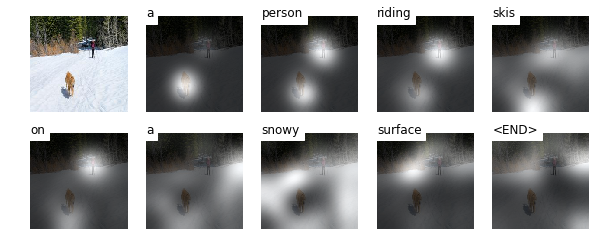

Sampled Caption: an elephant with a bird on his head outside <END>


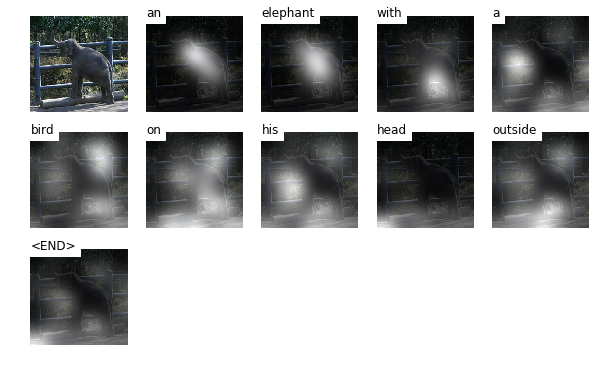

Sampled Caption: a woman and child skiing down a hill <END>


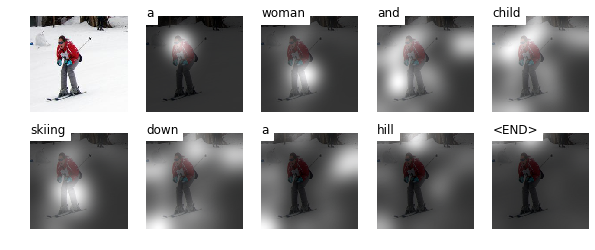

Sampled Caption: a toothbrush and a tooth brush in a bathroom <END>


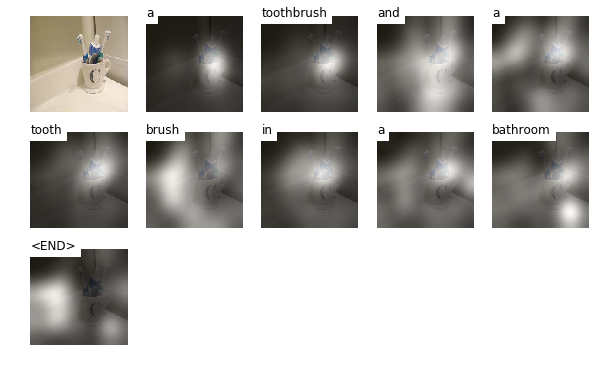

Sampled Caption: a person that is sitting at a table and eating <END>


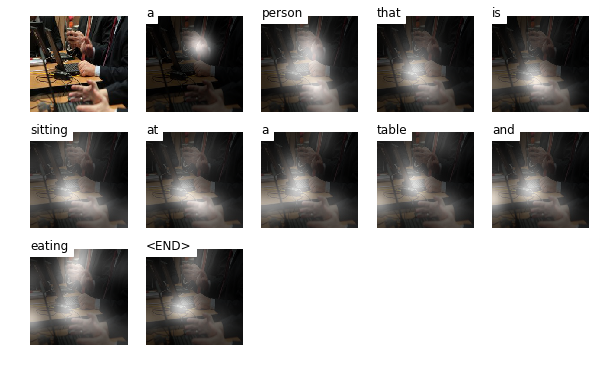

Sampled Caption: a group of people sitting on a green lawn <END>


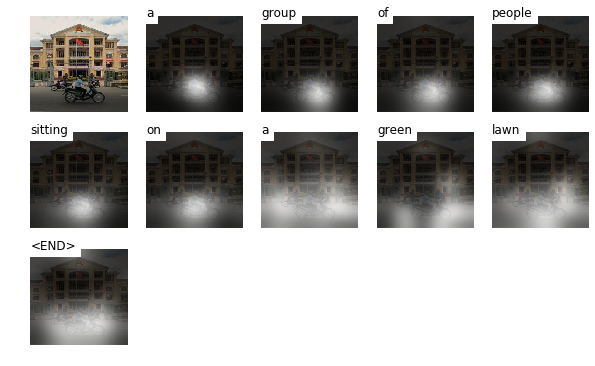

Sampled Caption: a man surfing on a wave at the beach <END>


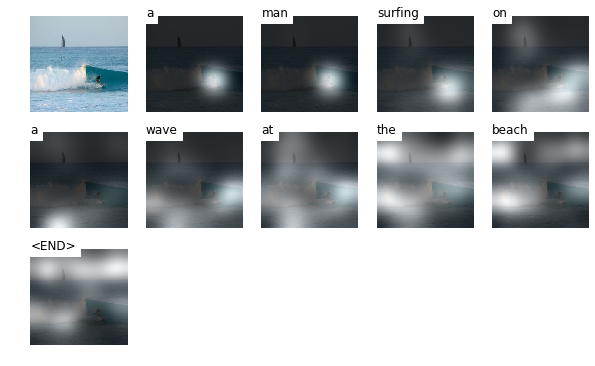

Sampled Caption: two young people sitting at a table eating food <END>


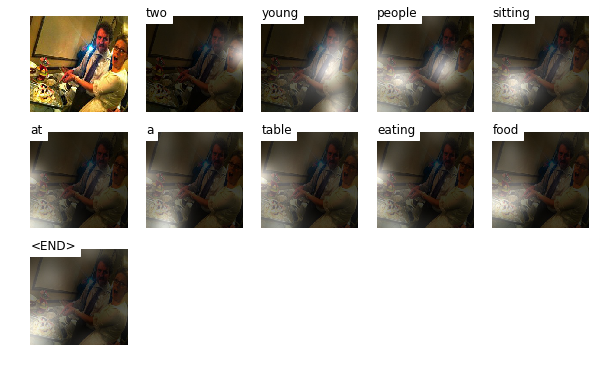

Sampled Caption: a bird sitting on a branch in tree leaves <END>


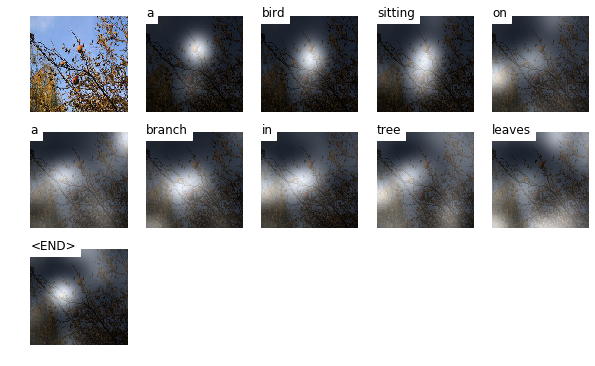

Sampled Caption: a person is grabbing a doughnut from a box <END>


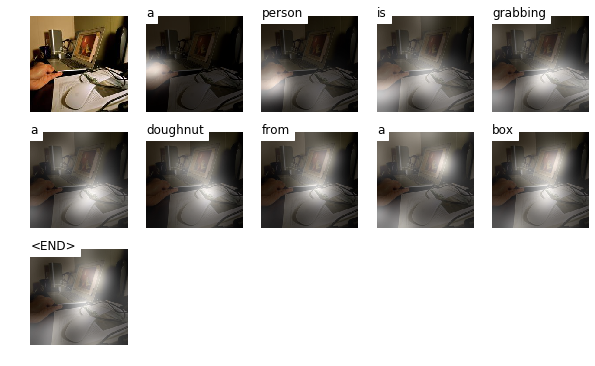

saved val.candidate.captions.pkl..


In [10]:
# sampled captions and visualize attention weights for validation dataset
solver.test(val_data, split='val')

In [11]:
# load test dataset
test_data = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (24162,) int32
captions <type 'numpy.ndarray'> (24162, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) <U29
elapse time: 13.37


Sampled Caption: a man and woman are posing with a video game <END>


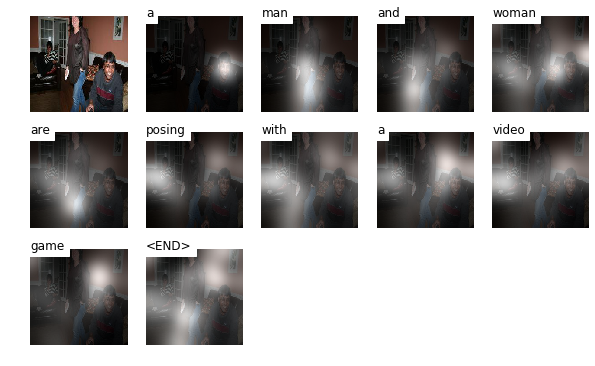

Sampled Caption: a man is trying to hit a tennis ball <END>


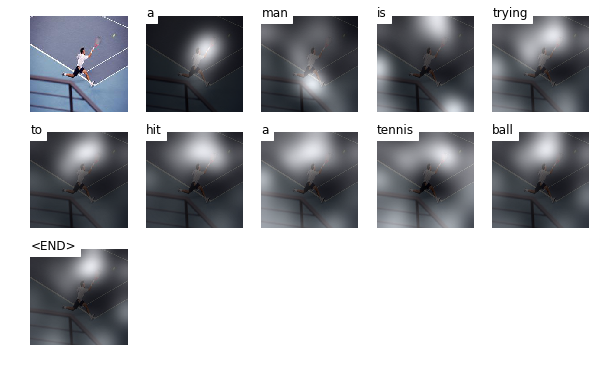

Sampled Caption: a couple of large sized bears are sitting in a cage <END>


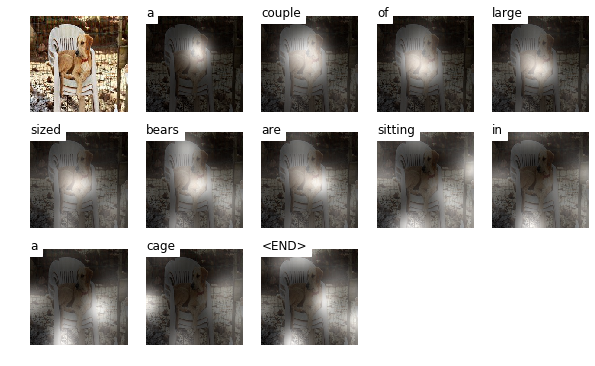

Sampled Caption: a baseball player swinging a bat on a field <END>


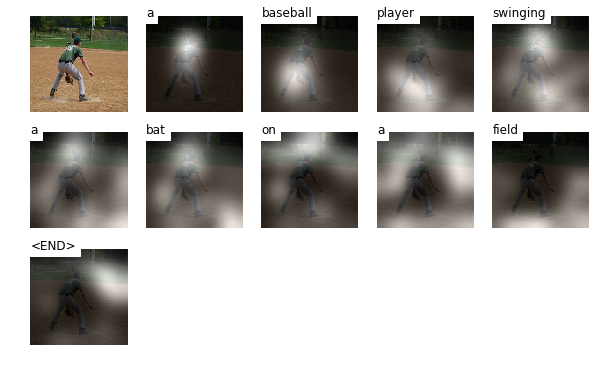

Sampled Caption: a flock of birds flying through a blue sky <END>


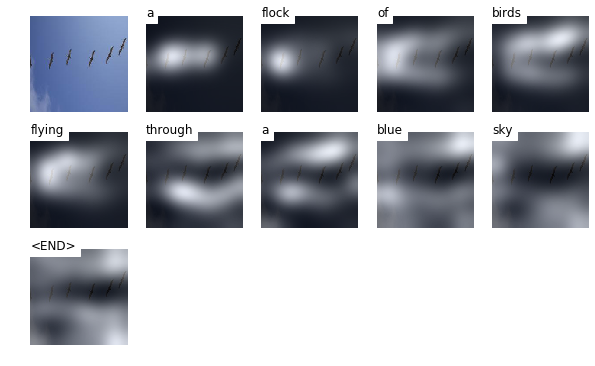

Sampled Caption: a very cluttered living room with a small table and <UNK> <END>


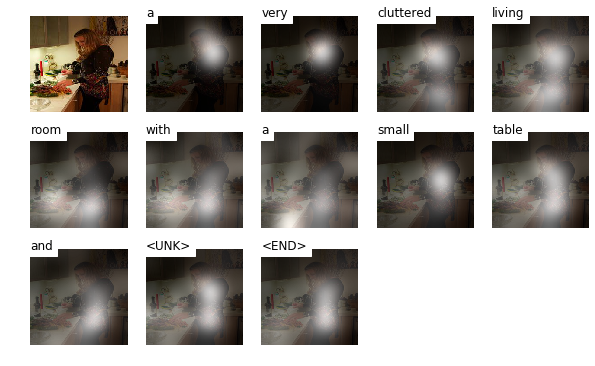

Sampled Caption: a man standing next to his motorcycle parked on the street <END>


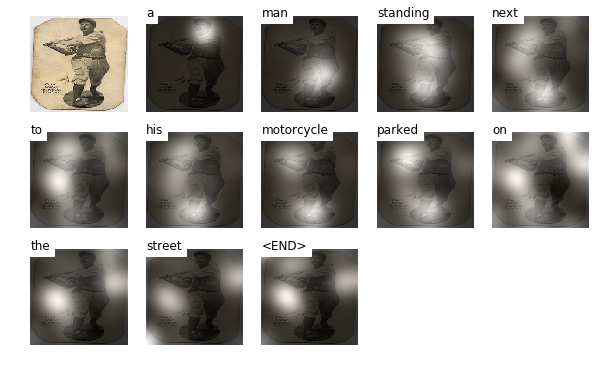

Sampled Caption: a plate with eggs muffin and mashed potatoes <END>


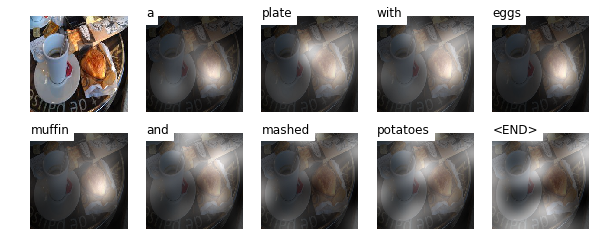

Sampled Caption: a picture of a train moving along a railway <END>


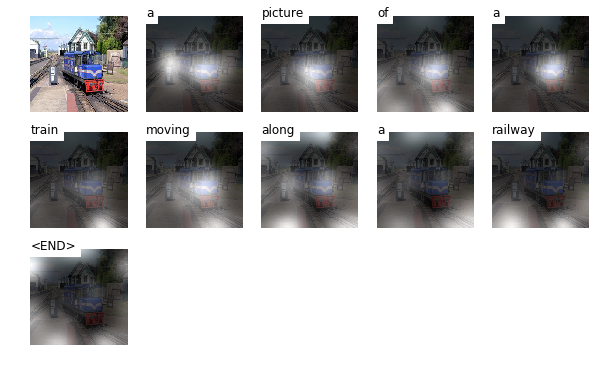

Sampled Caption: a man doing a trick on a skateboard in a skate park <END>


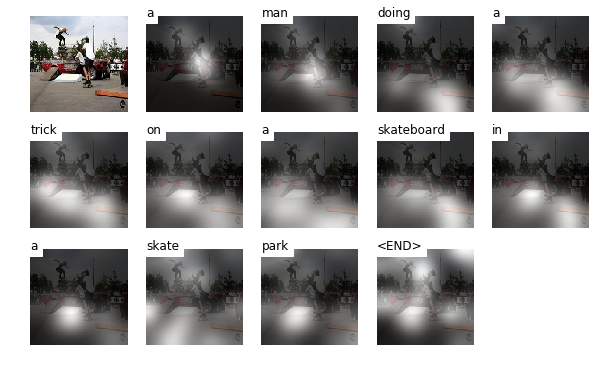

saved test.candidate.captions.pkl..


In [12]:
# sampled captions and visualize attention weights for validation dataset
solver.test(test_data, split='test')

In [13]:
# BLUE score for train dataset
evaluate(data_path='./data', split='train')

BLEU1: 0.652796
BLEU2: 0.513047
BLEU3: 0.379919
BLEU4: 0.276254


In [14]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='val')

BLEU1: 0.506490
BLEU2: 0.300116
BLEU3: 0.146885
BLEU4: 0.064483


In [15]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='test')

BLEU1: 0.504667
BLEU2: 0.296355
BLEU3: 0.142249
BLEU4: 0.063295
